In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

### Analyzing Data Set

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
df.shape

(13320, 9)

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### Data Cleaning Process

In [8]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### Fixing missing values 
* society - drop - 41% data missing 
* location - fill - using mode
* size - fill - using median
* bath - fill - using median
* balcony - fill - using median

In [9]:


df.drop(columns=['society'], inplace=True)  

df['size'] = df['size'].fillna(df['size'].mode()[0])
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['bath'] = df['bath'].fillna(df['bath'].median())
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

In [10]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

### Checking Columns Seperately & Converting Categorical Feature to Numerical Feature

In [11]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


#### Using Label Encoder to encode 'area_type' column
* 0 - Built-up Area
* 1 - Carpet  Area
* 2 - Plot Area	
* 3 - Super built-up Area

In [12]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df['area_type'] = labelEncoder.fit_transform(df['area_type'])

In [14]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,2,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,0,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,3,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


#### For 'availability' column
* All dates Converted to DD-MM-YYYY
* For those not having date time, they are converted to 1-Jan-2025 

In [15]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [16]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,2,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,0,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,3,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [17]:
def convert_date(value):
    if value in ['Immediate Possession', 'Ready To Move']:
        return '1-Jan-2025'
    else:
        try:
    
            date_obj = datetime.strptime(value, '%d-%b')
            return date_obj.replace(year=2025).strftime('%d-%b-%Y')
        except ValueError:
            return value  


df['availability'] = df['availability'].apply(convert_date)



In [18]:
df['availability'] = pd.to_datetime(df['availability'], format='%d-%b-%Y')

# Extract day, month, and year into separate columns
df['availability_day'] = df['availability'].dt.day
df['availability_month'] = df['availability'].dt.month
df['availability_year'] = df['availability'].dt.year

df = df.drop(columns=['availability'])


In [19]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,availability_day,availability_month,availability_year
0,3,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,19,12,2025
1,2,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,1,1,2025
2,0,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1,1,2025
3,3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1,1,2025
4,3,Kothanur,2 BHK,1200,2.0,1.0,51.00,1,1,2025


#### For 'size' column 
* Spliting and storing bhk in size_bhk
* 2 BHK - 2
* 8 Bedroom - 8

In [20]:
df['size'].unique()


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
df['size_bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df['size_bhk'].unique()

df = df.drop(columns=['size'])

In [22]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,availability_day,availability_month,availability_year,size_bhk
0,3,Electronic City Phase II,1056,2.0,1.0,39.07,19,12,2025,2
1,2,Chikka Tirupathi,2600,5.0,3.0,120.00,1,1,2025,4
2,0,Uttarahalli,1440,2.0,3.0,62.00,1,1,2025,3
3,3,Lingadheeranahalli,1521,3.0,1.0,95.00,1,1,2025,3
4,3,Kothanur,1200,2.0,1.0,51.00,1,1,2025,2


#### For 'total_sqft'
* For normal float value keeping like that
* For '1133 - 1384' - we will take the average
* For 34.46Sq. Meter - just taking float value

In [23]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [24]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [25]:
df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,location,total_sqft,bath,balcony,price,availability_day,availability_month,availability_year,size_bhk
30,3,Yelahanka,2100 - 2850,4.0,0.0,186.000,19,12,2025,4
56,0,Devanahalli,3010 - 3410,2.0,2.0,192.000,20,2,2025,4
81,0,Hennur Road,2957 - 3450,2.0,2.0,224.500,18,10,2025,4
122,3,Hebbal,3067 - 8156,4.0,0.0,477.000,18,3,2025,4
137,3,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,19,3,2025,2
165,3,Sarjapur,1145 - 1340,2.0,0.0,43.490,18,12,2025,2
188,3,KR Puram,1015 - 1540,2.0,0.0,56.800,1,1,2025,2
224,3,Devanahalli,1520 - 1740,2.0,2.0,74.820,19,12,2025,3
410,3,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1,1,2025,1
549,3,Hennur Road,1195 - 1440,2.0,0.0,63.770,18,9,2025,2


In [26]:
import re
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        try:
            return (float(tokens[0].strip()) + float(tokens[1].strip())) / 2
        except ValueError:
            return None 
    
   
    num_match = re.findall(r"[-+]?\d*\.?\d+", x)  
    if num_match:
        try:
            return float(num_match[0])  
        except ValueError:
            return None

    return None

In [27]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ], shape=(2027,))

In [28]:
df.head(10)

,area_type,location,total_sqft,bath,balcony,price,availability_day,availability_month,availability_year,size_bhk
0,3,Electronic City Phase II,1056.0,2.0,1.0,39.07,19,12,2025,2
1,2,Chikka Tirupathi,2600.0,5.0,3.0,120.00,1,1,2025,4
2,0,Uttarahalli,1440.0,2.0,3.0,62.00,1,1,2025,3
3,3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,1,1,2025,3
4,3,Kothanur,1200.0,2.0,1.0,51.00,1,1,2025,2
5,3,Whitefield,1170.0,2.0,1.0,38.00,1,1,2025,2
6,3,Old Airport Road,2732.0,4.0,2.0,204.00,18,5,2025,4
7,3,Rajaji Nagar,3300.0,4.0,2.0,600.00,1,1,2025,4
8,3,Marathahalli,1310.0,3.0,1.0,63.25,1,1,2025,3
9,2,Gandhi Bazar,1020.0,6.0,2.0,370.00,1,1,2025,6


#### All Clear for 'bath','balcony' & 'price'

In [29]:
print(df['bath'].unique())
print(df['balcony'].unique())
print(df['price'].unique())

[ 2.  5.  3.  4.  6.  1.  9.  8.  7. 11. 10. 14. 27. 12. 16. 40. 15. 13.
 18.]
[1. 3. 2. 0.]
[ 39.07 120.    62.   ...  40.14 231.   488.  ]


#### Converting price & total_sqft to price_per_sqft

In [30]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

In [31]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,availability_day,availability_month,availability_year,size_bhk,price_per_sqft
0,3,Electronic City Phase II,1056.0,2.0,1.0,39.07,19,12,2025,2,3699.810606
1,2,Chikka Tirupathi,2600.0,5.0,3.0,120.00,1,1,2025,4,4615.384615
2,0,Uttarahalli,1440.0,2.0,3.0,62.00,1,1,2025,3,4305.555556
3,3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,1,1,2025,3,6245.890861
4,3,Kothanur,1200.0,2.0,1.0,51.00,1,1,2025,2,4250.000000


#### Handling 'location'

In [32]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

location
Whitefield                              542
Sarjapur  Road                          399
Electronic City                         304
Kanakpura Road                          273
Thanisandra                             237
                                       ... 
Duddanahalli                              1
Doddanakunte                              1
Jogupalya                                 1
Subhash Nagar                             1
Kengeri Satellite Town KHB Apartment      1
Name: count, Length: 1294, dtype: int64

In [33]:
len(location_stats[location_stats <= 10])

1053

In [34]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [35]:
df.iloc[:10]

,area_type,location,total_sqft,bath,balcony,price,availability_day,availability_month,availability_year,size_bhk,price_per_sqft
0,3,Electronic City Phase II,1056.0,2.0,1.0,39.07,19,12,2025,2,3699.810606
1,2,Chikka Tirupathi,2600.0,5.0,3.0,120.00,1,1,2025,4,4615.384615
2,0,Uttarahalli,1440.0,2.0,3.0,62.00,1,1,2025,3,4305.555556
3,3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,1,1,2025,3,6245.890861
4,3,Kothanur,1200.0,2.0,1.0,51.00,1,1,2025,2,4250.000000
5,3,Whitefield,1170.0,2.0,1.0,38.00,1,1,2025,2,3247.863248
6,3,Old Airport Road,2732.0,4.0,2.0,204.00,18,5,2025,4,7467.057101
7,3,Rajaji Nagar,3300.0,4.0,2.0,600.00,1,1,2025,4,18181.818182
8,3,Marathahalli,1310.0,3.0,1.0,63.25,1,1,2025,3,4828.244275
9,2,other,1020.0,6.0,2.0,370.00,1,1,2025,6,36274.509804


### Outlier Detection & Removal

##### 1. Removing the houses with less total_sqfl with high BHK

In [36]:
df[df.total_sqft/df.size_bhk < 300].head()

,area_type,location,total_sqft,bath,balcony,price,availability_day,availability_month,availability_year,size_bhk,price_per_sqft
9,2,other,1020.0,6.0,2.0,370.0,1,1,2025,6,36274.509804
45,2,HSR Layout,600.0,9.0,2.0,200.0,1,1,2025,8,33333.333333
58,2,Murugeshpalya,1407.0,4.0,1.0,150.0,1,1,2025,6,10660.980810
68,2,Devarachikkanahalli,1350.0,7.0,0.0,85.0,1,1,2025,8,6296.296296
70,2,other,500.0,3.0,2.0,100.0,1,1,2025,3,20000.000000


In [37]:
df = df[~(df.total_sqft/df.size_bhk < 300)]

#### 2. Removing the anomly of Ruppess 264 per sqft

In [38]:
df.price_per_sqft.describe()

count     12538.000000
mean       6303.772400
std        4161.151656
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [40]:
df = remove_pps_outliers(df)
df.shape

(10308, 11)

#### 3. Checking if the sqft is same bhk is more but price is less

C:\Users\jasje\AppData\Local\Temp\ipykernel_8824\336760870.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk2 = df[df.location==location][df.size_bhk==2]
C:\Users\jasje\AppData\Local\Temp\ipykernel_8824\336760870.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bhk3 = df[df.location==location][df.size_bhk==3]


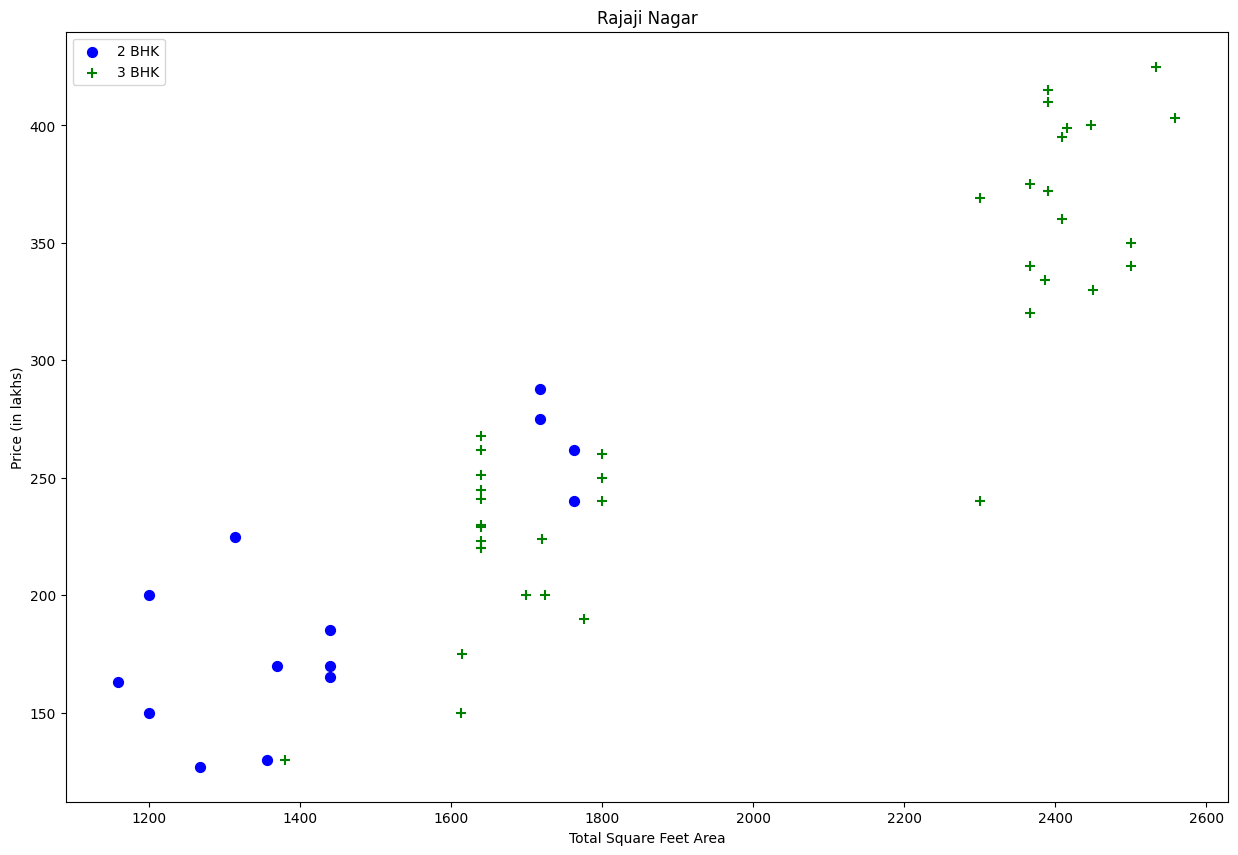

In [41]:
def plot_scatter_chart(df,location):
    bhk2 = df[df.location==location][df.size_bhk==2]
    bhk3 = df[df.location==location][df.size_bhk==3]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (in lakhs)")
    plt.title(location)
    plt.legend()
    plt.show()

plot_scatter_chart(df,"Rajaji Nagar")


In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size_bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size_bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df = remove_bhk_outliers(df)
df.shape

(7361, 11)

#### 4. Checking for the high no of bathrooms in less bhk

In [43]:
df[df.bath>df.size_bhk+2]

,area_type,location,total_sqft,bath,balcony,price,availability_day,availability_month,availability_year,size_bhk,price_per_sqft
1638,0,Chikkabanavar,2460.0,7.0,2.0,80.0,1,1,2025,4,3252.032520
5276,0,Nagasandra,7000.0,8.0,2.0,450.0,1,1,2025,4,6428.571429
6762,3,Thanisandra,1806.0,6.0,2.0,116.0,1,1,2025,3,6423.034330
8474,3,other,11338.0,9.0,1.0,1000.0,1,1,2025,6,8819.897689


In [44]:
df = df[df.bath<df.size_bhk+2]

In [45]:
# No use for them
df.drop(columns=['price_per_sqft','availability_year'],inplace=True) 

In [46]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,availability_day,availability_month,size_bhk
0,3,1st Block Jayanagar,2850.0,4.0,1.0,428.0,20,5,4
1,3,1st Block Jayanagar,1630.0,3.0,2.0,194.0,18,6,3
2,3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,1,1,3
3,0,1st Block Jayanagar,1200.0,2.0,0.0,130.0,15,12,3
4,3,1st Block Jayanagar,1235.0,2.0,2.0,148.0,18,6,2


### One Hot Encoding

In [47]:
dummies = pd.get_dummies(df.location).astype(int)
dummies.head(20)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_final = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df_final.head()

,area_type,location,total_sqft,bath,balcony,price,availability_day,availability_month,size_bhk,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,1st Block Jayanagar,2850.0,4.0,1.0,428.0,20,5,4,1,...,0,0,0,0,0,0,0,0,0,0
1,3,1st Block Jayanagar,1630.0,3.0,2.0,194.0,18,6,3,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1st Block Jayanagar,1200.0,2.0,0.0,130.0,15,12,3,1,...,0,0,0,0,0,0,0,0,0,0
4,3,1st Block Jayanagar,1235.0,2.0,2.0,148.0,18,6,2,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_final.drop(columns=['location'], inplace=True)

In [50]:
df_final.head()

,area_type,total_sqft,bath,balcony,price,availability_day,availability_month,size_bhk,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,2850.0,4.0,1.0,428.0,20,5,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,2.0,194.0,18,6,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,3.0,235.0,1,1,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1200.0,2.0,0.0,130.0,15,12,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1235.0,2.0,2.0,148.0,18,6,2,1,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting & Scaling

#### 1. Spliting X as dependent features & y as independent features

In [51]:
X = df_final.drop('price',axis='columns')

In [52]:
y = df_final.price

#### 2. Train Test Split

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [55]:
y_train.head()


5733      55.78
10210    425.00
6836      50.00
674       39.00
7967      36.80
Name: price, dtype: float64

#### 3. Using Standard Scalar to Scale the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.55072221, -0.20814856, -0.43837775, ..., -0.06015143,
        -0.03211082, -0.06949881],
       [ 0.55072221,  2.41873785,  0.61986941, ..., -0.06015143,
        -0.03211082, -0.06949881],
       [ 0.55072221, -0.60032823, -0.43837775, ..., -0.06015143,
        -0.03211082, -0.06949881],
       ...,
       [-0.3200587 ,  0.39566466,  1.67811658, ..., -0.06015143,
        -0.03211082, -0.06949881],
       [ 0.55072221, -0.25956235, -0.43837775, ..., -0.06015143,
        -0.03211082, -0.06949881],
       [ 0.55072221, -0.96022482, -1.49662492, ..., -0.06015143,
        -0.03211082, -0.06949881]], shape=(5825, 248))

In [ ]:
import pickle

# Save the scaler object to a file
with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

### Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train_scaled, y_train) #ded

LinearRegression()

In [ ]:
linear.score(X_test_scaled, y_test)

0.798532665184615

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(linear, X, y, cv=cv)

array([0.87796684, 0.86050551, 0.79697826, 0.84647751, 0.85181566])

In [ ]:

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False],
                'n_jobs': [None, -1, 1, 2, 3, 4, 5]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic'],
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1,2],
            }
        },
        'elastic_net': {
            'model': ElasticNet(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic'],
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, algo in algos.items():
        gs = GridSearchCV(algo['model'], algo['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

models = find_best_model_using_gridsearchcv(X_train_scaled,y_train) # ded

c:\Users\jasje\Desktop\Real Estate Price Predicition\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jasje\Desktop\Real Estate Price Predicition\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jasje\Desktop\Real Estate Price Predicition\venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\jasje\Desktop\Real Estate Price Predicition\venv\lib\site-packages\sklea

In [ ]:
models

,model,best_score,best_params
0,linear_regression,0.843282,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.808915,"{'alpha': 1, 'selection': 'cyclic'}"
2,ridge,0.843279,{'alpha': 1}
3,elastic_net,0.756451,"{'alpha': 1, 'selection': 'cyclic'}"
4,decision_tree,0.733671,{'criterion': 'friedman_mse'}


In [ ]:
linear = LinearRegression(fit_intercept=False, copy_X=True, n_jobs=None)

In [ ]:
linear.fit(X_train_scaled, y_train) ## ded



LinearRegression(fit_intercept=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Linear Regression
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1, 1, 2, 3, 4, 5]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=linear, param_grid=param_grid, cv=cv, return_train_score=False)

# Fit the model
grid_search.fit(X_train_scaled, y_train) #dedddddd

# Get the best model
best_model = grid_search.best_estimator_

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Return the best model
best_model

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}
Best Score: 0.843281776337078


LinearRegression()

In [ ]:
grid_search.score(X_test_scaled, y_test)

0.798532665184615

### Models, Scalar & Datasets Saving

In [ ]:


import pickle
with open('bangalore_house_price_prediction_model.pickle','wb') as f:
    pickle.dump(grid_search, f)

In [ ]:
# Save df_final to a CSV file
df_final.to_csv('df_final.csv', index=False)

# Save df_final_scaled to a CSV file
df_final_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_final_scaled.to_csv('df_final_scaled.csv', index=False)

In [ ]:
import json 
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
print(df_final.iloc[0][0:9])
print(df_final_scaled.iloc[0][0:9])

area_type                 3.0
total_sqft             2850.0
bath                      4.0
balcony                   1.0
price                   428.0
availability_day         20.0
availability_month        5.0
size_bhk                  4.0
1st Block Jayanagar       1.0
Name: 0, dtype: float64
area_type              0.550722
total_sqft            -0.208149
bath                  -0.438378
balcony                0.560131
availability_day      -0.509445
availability_month    -0.428303
size_bhk              -0.528636
1st Block Jayanagar   -0.032111
1st Phase JP Nagar    -0.050811
Name: 0, dtype: float64
